In [296]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [297]:
import warnings
warnings.filterwarnings("ignore")

In [299]:
df_train = pd.read_csv('Assignment_OOT_Data.csv')
df_train.head()

,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,VAR8,VAR9,VAR10,...,VAR28,VAR29,VAR30,VAR31,VAR32,VAR33,VAR34,VAR35,VAR36,VAR37
0,19155698,NaN,Mumbai-Goregaon Branch,N,50000.0,4,Y,20.38157,2500000.0,HDFC BANK,...,23-03-2017,0,Resident Indian,10.0,no,N,Maharashtra,HDFC BANK,500000.0,West
1,19349593,0,Chennai - T Nagar,NaN,67455.0,17,N,NaN,327505.0,Brokers & Small CA,...,06-06-2017,0,Resident Indian,10.0,yes,NaN,Karnataka,Brokers,377506.0,South 2
2,19236760,-,Ahmedabad Vastrapur Branch,NaN,24094.0,7,N,NaN,177268.0,Brokers & Small CA,...,10-04-2017,0,Resident Indian,15.0,yes,NaN,Gujarat,Brokers,177269.0,West
3,19105772,0.8596,Pathankot - Dalhousie Road,N,50000.0,55,N,22.49135,500000.0,HDFC BANK,...,24-02-2017,0,Resident Indian,15.0,yes,N,Punjab,HDFC BANK,1000000.0,North 1
4,19610760,0.7824,Pune City Mall,N,50000.0,71,Y,22.72044,1500000.0,Ex-HDFC,...,09-09-2017,0,Resident Indian,10.0,no,N,Maharashtra,HDFC Sales,1500000.0,West


In [300]:
dic = pd.read_excel('Assignment - Data_Dictionary.xlsx')
dic.head()

,Variable Flag,Variable Detail
0,VAR1,Masked Policy Identifier
1,VAR2,Mapped Agent 13M Persistency
2,VAR3,Mapped Agent Branch
3,VAR4,Application Life Assured Alcohol Declaration
4,VAR5,Applicant's Policy Annualized Premium


In [301]:
df_train.columns

Index(['VAR1', 'VAR2', 'VAR3', 'VAR4', 'VAR5', 'VAR6', 'VAR7', 'VAR8', 'VAR9',
       'VAR10', 'VAR11', 'VAR12', 'VAR13', 'VAR14', 'VAR15', 'VAR16', 'VAR17',
       'VAR18', 'VAR19', 'VAR20', 'VAR21', 'VAR22', 'VAR23', 'VAR24', 'VAR25',
       'VAR26', 'VAR27', 'VAR28', 'VAR29', 'VAR30', 'VAR31', 'VAR32', 'VAR33',
       'VAR34', 'VAR35', 'VAR36', 'VAR37'],
      dtype='object')

In [302]:
df_train.columns = dic['Variable Detail']

In [303]:
df = df_train.copy()

In [304]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 37 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Masked Policy Identifier                               30000 non-null  int64  
 1   Mapped Agent 13M Persistency                           20205 non-null  object 
 2   Mapped Agent Branch                                    30000 non-null  object 
 3   Application Life Assured Alcohol Declaration           18526 non-null  object 
 4   Applicant's Policy Annualized Premium                  30000 non-null  float64
 5   Mapped Agent Vintage                                   30000 non-null  int64  
 6   Auto Debit of Premium Opted Flag(Yes/No)               30000 non-null  object 
 7   Application Life Assured BMI                           18526 non-null  float64
 8   Total Risk Exposure of HDFC Life w.r.t. Life A

In [305]:
df['Mapped Agent 13M Persistency'][df['Mapped Agent 13M Persistency'] == '-'] = ''

In [306]:
df['Mapped Agent 13M Persistency'] = df['Mapped Agent 13M Persistency'].apply(pd.to_numeric)

In [307]:
df = df.drop('Masked Policy Identifier',axis =1)

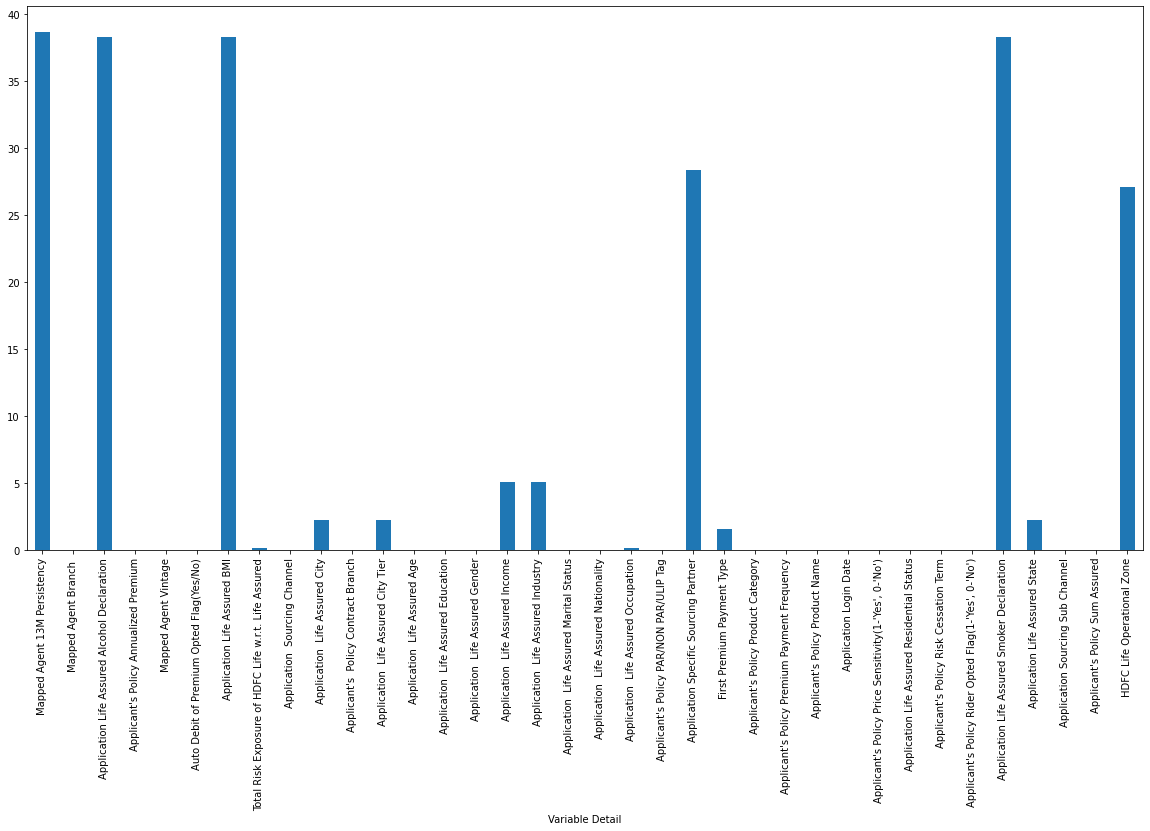

In [308]:
(df.isna().sum()/df.shape[0] * 100).plot(kind = 'bar',figsize=(20,10))

In [309]:
x = df.isna().sum()/df.shape[0] * 100
x[x > 0.0]  # missing values

Variable Detail
Mapped Agent 13M Persistency                            38.616667
Application Life Assured Alcohol Declaration            38.246667
Application Life Assured BMI                            38.246667
Total Risk Exposure of HDFC Life w.r.t. Life Assured     0.106667
Application  Life Assured City                           2.223333
Application  Life Assured City Tier                      2.236667
Application  Life Assured Income                         5.103333
Application  Life Assured Industry                       5.046667
Application  Life Assured Occupation                     0.106667
Application Specific Sourcing Partner                   28.373333
First Premium Payment Type                               1.596667
Application Life Assured Smoker Declaration             38.246667
Application Life Assured State                           2.223333
HDFC Life Operational Zone                              27.083333
dtype: float64

In [310]:
df.describe()

Variable Detail,Mapped Agent 13M Persistency,Applicant's Policy Annualized Premium,Mapped Agent Vintage,Application Life Assured BMI,Total Risk Exposure of HDFC Life w.r.t. Life Assured,Application Life Assured Age,Application Life Assured Income,"Applicant's Policy Price Sensitivity(1-'Yes', 0-'No')",Applicant's Policy Risk Cessation Term,Applicant's Policy Sum Assured
count,18415.000000,3.000000e+04,30000.000000,18526.000000,2.996800e+04,30000.000000,2.846900e+04,30000.000000,30000.000000,3.000000e+04
mean,0.809488,5.356715e+04,28.293300,24.243408,1.725513e+06,38.331133,8.347613e+05,0.112767,14.838067,1.730925e+06
std,0.179400,8.396050e+04,26.932954,8.128877,9.596186e+06,10.889636,4.369550e+06,0.316313,7.881631,5.442750e+06
min,0.000000,9.120000e+02,0.000000,0.781250,0.000000e+00,0.000000,0.000000e+00,0.000000,5.000000,0.000000e+00
25%,0.810100,2.400000e+04,10.000000,22.313280,2.000000e+05,31.000000,3.000000e+05,0.000000,10.000000,2.112290e+05
50%,0.830700,3.349300e+04,23.000000,23.875110,3.750000e+05,37.000000,5.000000e+05,0.000000,10.000000,4.514960e+05
75%,0.909900,5.000000e+04,34.000000,25.593740,9.999900e+05,46.000000,7.000000e+05,0.000000,16.000000,1.000000e+06
max,1.000000,5.000000e+06,203.000000,743.801650,1.000000e+09,66.000000,6.134701e+08,1.000000,65.000000,5.000000e+08


In [311]:
# Categorical Columns in df
df_cat = df[['Mapped Agent Branch ', 'Application Life Assured Alcohol Declaration',
       'Auto Debit of Premium Opted Flag(Yes/No)',
       'Application  Sourcing Channel', 'Application  Life Assured City',
       'Applicant\'s  Policy Contract Branch',
       'Application  Life Assured Education',
        'Application  Life Assured City Tier',
       'Application  Life Assured Gender',
       'Application  Life Assured Industry',
       'Application  Life Assured Marital Status',
       'Application  Life Assured Nationality',
       'Application  Life Assured Occupation',
       'Applicant\'s Policy PAR/NON PAR/ULIP Tag',
       'Application Specific Sourcing Partner', 'First Premium Payment Type',
       'Applicant\'s Policy Product Category',
       'Applicant\'s Policy Premium Payment Frequency',
       'Applicant\'s Policy Product Name', 'Application Login Date',
       'Application Life Assured Residential Status',
       'Application Life Assured Smoker Declaration',
       'Application Life Assured State', 'Application Sourcing Sub Channel',
       'HDFC Life Operational Zone']]

In [312]:
df1 = df.drop(df_cat.columns, axis =1 )

In [313]:
df1.head()

Variable Detail,Mapped Agent 13M Persistency,Applicant's Policy Annualized Premium,Mapped Agent Vintage,Application Life Assured BMI,Total Risk Exposure of HDFC Life w.r.t. Life Assured,Application Life Assured Age,Application Life Assured Income,"Applicant's Policy Price Sensitivity(1-'Yes', 0-'No')",Applicant's Policy Risk Cessation Term,"Applicant's Policy Rider Opted Flag(1-'Yes', 0-'No')",Applicant's Policy Sum Assured
0,NaN,50000.0,4,20.38157,2500000.0,35,800000.0,0,10.0,no,500000.0
1,0.0000,67455.0,17,NaN,327505.0,33,300000.0,0,10.0,yes,377506.0
2,NaN,24094.0,7,NaN,177268.0,45,500000.0,0,15.0,yes,177269.0
3,0.8596,50000.0,55,22.49135,500000.0,37,1200000.0,0,15.0,yes,1000000.0
4,0.7824,50000.0,71,22.72044,1500000.0,43,3000000.0,0,10.0,no,1500000.0


In [314]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 11 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Mapped Agent 13M Persistency                           18415 non-null  float64
 1   Applicant's Policy Annualized Premium                  30000 non-null  float64
 2   Mapped Agent Vintage                                   30000 non-null  int64  
 3   Application Life Assured BMI                           18526 non-null  float64
 4   Total Risk Exposure of HDFC Life w.r.t. Life Assured   29968 non-null  float64
 5   Application  Life Assured Age                          30000 non-null  int64  
 6   Application  Life Assured Income                       28469 non-null  float64
 7   Applicant's Policy Price Sensitivity(1-'Yes', 0-'No')  30000 non-null  int64  
 8   Applicant's Policy Risk Cessation Term        

In [315]:
df1.isna().sum()

Variable Detail
Mapped Agent 13M Persistency                             11585
Applicant's Policy Annualized Premium                        0
Mapped Agent Vintage                                         0
Application Life Assured BMI                             11474
Total Risk Exposure of HDFC Life w.r.t. Life Assured        32
Application  Life Assured Age                                0
Application  Life Assured Income                          1531
Applicant's Policy Price Sensitivity(1-'Yes', 0-'No')        0
Applicant's Policy Risk Cessation Term                       0
Applicant's Policy Rider Opted Flag(1-'Yes', 0-'No')         0
Applicant's Policy Sum Assured                               0
dtype: int64

In [316]:
df1_miss = df1[['Mapped Agent 13M Persistency', 'Applicant\'s Policy Annualized Premium',
       'Mapped Agent Vintage', 'Application Life Assured BMI',
       'Total Risk Exposure of HDFC Life w.r.t. Life Assured',
       'Application  Life Assured Age', 'Application  Life Assured Income']]

## Numeric Missing Values handling 

In [317]:
df1_miss.columns

Index(['Mapped Agent 13M Persistency', 'Applicant's Policy Annualized Premium',
       'Mapped Agent Vintage', 'Application Life Assured BMI',
       'Total Risk Exposure of HDFC Life w.r.t. Life Assured',
       'Application  Life Assured Age', 'Application  Life Assured Income'],
      dtype='object', name='Variable Detail')

In [318]:
df['Mapped Agent 13M Persistency'][df['Mapped Agent 13M Persistency'] == 0.0].shape
# 533 values have 0 values

(254,)

In [319]:
df['Mapped Agent 13M Persistency'] =df['Mapped Agent 13M Persistency'].apply(lambda x: x * 100 if (x < 1.0) else x )

In [320]:
(df['Mapped Agent 13M Persistency'] < 1).sum()  # equal to 0

254

In [321]:
df1_miss.columns.shape  # 28 columns have missing values

(7,)

In [322]:
df1_miss.isna().sum()/df_train.shape[0] * 100

Variable Detail
Mapped Agent 13M Persistency                            38.616667
Applicant's Policy Annualized Premium                    0.000000
Mapped Agent Vintage                                     0.000000
Application Life Assured BMI                            38.246667
Total Risk Exposure of HDFC Life w.r.t. Life Assured     0.106667
Application  Life Assured Age                            0.000000
Application  Life Assured Income                         5.103333
dtype: float64

In [323]:
df1_miss.describe()

Variable Detail,Mapped Agent 13M Persistency,Applicant's Policy Annualized Premium,Mapped Agent Vintage,Application Life Assured BMI,Total Risk Exposure of HDFC Life w.r.t. Life Assured,Application Life Assured Age,Application Life Assured Income
count,18415.000000,3.000000e+04,30000.000000,18526.000000,2.996800e+04,30000.000000,2.846900e+04
mean,0.809488,5.356715e+04,28.293300,24.243408,1.725513e+06,38.331133,8.347613e+05
std,0.179400,8.396050e+04,26.932954,8.128877,9.596186e+06,10.889636,4.369550e+06
min,0.000000,9.120000e+02,0.000000,0.781250,0.000000e+00,0.000000,0.000000e+00
25%,0.810100,2.400000e+04,10.000000,22.313280,2.000000e+05,31.000000,3.000000e+05
50%,0.830700,3.349300e+04,23.000000,23.875110,3.750000e+05,37.000000,5.000000e+05
75%,0.909900,5.000000e+04,34.000000,25.593740,9.999900e+05,46.000000,7.000000e+05
max,1.000000,5.000000e+06,203.000000,743.801650,1.000000e+09,66.000000,6.134701e+08


In [324]:
stdToMeanRatio = df1_miss.std()/df1_miss.mean()

In [325]:
stdToMeanRatio

Variable Detail
Mapped Agent 13M Persistency                            0.221621
Applicant's Policy Annualized Premium                   1.567388
Mapped Agent Vintage                                    0.951920
Application Life Assured BMI                            0.335303
Total Risk Exposure of HDFC Life w.r.t. Life Assured    5.561354
Application  Life Assured Age                           0.284094
Application  Life Assured Income                        5.234490
dtype: float64

**We can see attributes like 'Applicant's Policy Annualized Premium', 'Mapped Agent Vintage', 'Total Risk Exposure of HDFC Life w.r.t. Life Assured', 'Application  Life Assured Income' have high std w.r.t mean so we can't impute mean values for these.**

In [326]:
stdToMedianRatio = df1_miss.std()/df1_miss.median()

In [327]:
stdToMedianRatio

Variable Detail
Mapped Agent 13M Persistency                             0.215962
Applicant's Policy Annualized Premium                    2.506807
Mapped Agent Vintage                                     1.170998
Application Life Assured BMI                             0.340475
Total Risk Exposure of HDFC Life w.r.t. Life Assured    25.589831
Application  Life Assured Age                            0.294314
Application  Life Assured Income                         8.739100
dtype: float64

**We can see attributes like 'Applicant's Policy Annualized Premium', 'Mapped Agent Vintage', 'Total Risk Exposure of HDFC Life w.r.t. Life Assured', 'Application  Life Assured Income' have high std w.r.t median so we can't impute median values for these.**

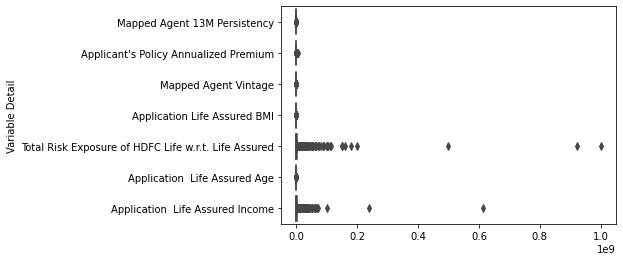

In [328]:
sns.boxplot(data= df1_miss ,palette='rainbow',orient='h')

In [329]:
df.shape

(30000, 36)

In [330]:
# remove rows of 'Applicant's Policy Annualized Premium', 'Mapped Agent Vintage', 
#'Total Risk Exposure of HDFC Life w.r.t. Life Assured', 'Application  Life Assured Age' as missing % is very less
np.where(df[['Applicant\'s Policy Annualized Premium', 'Mapped Agent Vintage',
         'Total Risk Exposure of HDFC Life w.r.t. Life Assured', 
         'Application  Life Assured Age']].isna())

(array([  359,  2015,  3018,  4156,  4400,  4808,  5391,  5435,  6628,
         8240, 11753, 12737, 12906, 18095, 18330, 18528, 20737, 20870,
        22059, 22297, 23046, 24600, 24689, 24793, 25973, 27316, 28465,
        28469, 28637, 28809, 29104, 29778], dtype=int64),
 array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64))

In [332]:
df.drop([ 359,  2015,  3018,  4156,  4400,  4808,  5391,  5435,  6628,
         8240, 11753, 12737, 12906, 18095, 18330, 18528, 20737, 20870,
        22059, 22297, 23046, 24600, 24689, 24793, 25973, 27316, 28465,
        28469, 28637, 28809, 29104, 29778],inplace =True, axis =0)

In [333]:
df.shape

(29961, 36)

In [334]:
df1_miss.drop([ 359,  2015,  3018,  4156,  4400,  4808,  5391,  5435,  6628,
         8240, 11753, 12737, 12906, 18095, 18330, 18528, 20737, 20870,
        22059, 22297, 23046, 24600, 24689, 24793, 25973, 27316, 28465,
        28469, 28637, 28809, 29104, 29778],inplace =True, axis =0)

In [335]:
df1.drop([ 359,  2015,  3018,  4156,  4400,  4808,  5391,  5435,  6628,
         8240, 11753, 12737, 12906, 18095, 18330, 18528, 20737, 20870,
        22059, 22297, 23046, 24600, 24689, 24793, 25973, 27316, 28465,
        28469, 28637, 28809, 29104, 29778],inplace =True, axis =0)

In [336]:
df1_miss.shape

(29968, 7)

In [337]:
df1.shape

(29968, 11)

In [338]:
df1_miss.isna().sum()/df_train.shape[0] * 100

Variable Detail
Mapped Agent 13M Persistency                            38.573333
Applicant's Policy Annualized Premium                    0.000000
Mapped Agent Vintage                                     0.000000
Application Life Assured BMI                            38.140000
Total Risk Exposure of HDFC Life w.r.t. Life Assured     0.000000
Application  Life Assured Age                            0.000000
Application  Life Assured Income                         4.996667
dtype: float64

In [339]:
df1_miss.drop(['Applicant\'s Policy Annualized Premium', 'Mapped Agent Vintage',
         'Total Risk Exposure of HDFC Life w.r.t. Life Assured', 
         'Application  Life Assured Age'],inplace = True,axis = 1)

In [340]:
df1_miss.isna().sum()/df_train.shape[0] * 100

Variable Detail
Mapped Agent 13M Persistency        38.573333
Application Life Assured BMI        38.140000
Application  Life Assured Income     4.996667
dtype: float64

In [341]:
# imputing - Mapped Agent 13M Persistency

In [342]:
# imputing - Application Life Assured BMI

In [343]:
# imputing - Application  Life Assured Income

## Categorical Missing Values Handling

In [344]:
# Categorical Columns in df
df_cat = df[['Mapped Agent Branch ', 'Application Life Assured Alcohol Declaration',
       'Auto Debit of Premium Opted Flag(Yes/No)',
       'Application  Sourcing Channel', 'Application  Life Assured City',
       'Applicant\'s  Policy Contract Branch',
       'Application  Life Assured Education',
        'Application  Life Assured City Tier',
       'Application  Life Assured Gender',
       'Application  Life Assured Industry',
       'Application  Life Assured Marital Status',
       'Application  Life Assured Nationality',
       'Application  Life Assured Occupation',
       'Applicant\'s Policy PAR/NON PAR/ULIP Tag',
       'Application Specific Sourcing Partner', 'First Premium Payment Type',
       'Applicant\'s Policy Product Category',
       'Applicant\'s Policy Premium Payment Frequency',
       'Applicant\'s Policy Product Name', 'Application Login Date',
       'Application Life Assured Residential Status',
       'Application Life Assured Smoker Declaration',
       'Application Life Assured State', 'Application Sourcing Sub Channel',
       'HDFC Life Operational Zone']]

In [345]:
df_cat.shape

(29961, 25)

In [346]:
df_cat.isna().sum()

Variable Detail
Mapped Agent Branch                                 0
Application Life Assured Alcohol Declaration    11440
Auto Debit of Premium Opted Flag(Yes/No)            0
Application  Sourcing Channel                       0
Application  Life Assured City                    665
Applicant's  Policy Contract Branch                 0
Application  Life Assured Education                 0
Application  Life Assured City Tier               669
Application  Life Assured Gender                    0
Application  Life Assured Industry               1482
Application  Life Assured Marital Status            0
Application  Life Assured Nationality               0
Application  Life Assured Occupation                0
Applicant's Policy PAR/NON PAR/ULIP Tag             0
Application Specific Sourcing Partner            8492
First Premium Payment Type                        479
Applicant's Policy Product Category                 0
Applicant's Policy Premium Payment Frequency        0
Applicant's 

In [347]:
df_cat_miss = df_cat[['Application Life Assured Alcohol Declaration',
       'Application  Sourcing Channel', 'Application  Life Assured City',
       'Applicant\'s  Policy Contract Branch',
       'Application  Life Assured City Tier',
       'Application  Life Assured Industry',
       'Application Specific Sourcing Partner', 'First Premium Payment Type',
       'Application Life Assured Smoker Declaration',
       'Application Life Assured State', 'Application Sourcing Sub Channel',
       'HDFC Life Operational Zone']]

In [348]:
df_cat_miss.head()

Variable Detail,Application Life Assured Alcohol Declaration,Application Sourcing Channel,Application Life Assured City,Applicant's Policy Contract Branch,Application Life Assured City Tier,Application Life Assured Industry,Application Specific Sourcing Partner,First Premium Payment Type,Application Life Assured Smoker Declaration,Application Life Assured State,Application Sourcing Sub Channel,HDFC Life Operational Zone
0,N,HDFC BANK,mumbai,Mumbai - Vasai,Tier I,Consultant,HDFC BANK,Cheque,N,Maharashtra,HDFC BANK,West
1,NaN,Brokers & Small CA,yadgir,Bellary - Parvathi Nagar,Tier III,Business,SMC Insurance Brokers Pvt. Ltd,Cheque,NaN,Karnataka,Brokers,South 2
2,NaN,Brokers & Small CA,surat,Ahmedabad - Vastrapur,Tier II,Agriculture,Sridhar Insurance Broker Pvt L,Cheque,NaN,Gujarat,Brokers,West
3,N,HDFC BANK,pathankot,Pathankot - Dalhousie Road,Tier III,Metals,HDFC BANK,Journal Entry,N,Punjab,HDFC BANK,North 1
4,N,Ex-HDFC,pune,Pune - Nandadeep Fc Road,Tier I,Automobile,HDFC Sales Private Limited,Cheque,N,Maharashtra,HDFC Sales,West


In [349]:
df_cat_miss.isna().sum()

Variable Detail
Application Life Assured Alcohol Declaration    11440
Application  Sourcing Channel                       0
Application  Life Assured City                    665
Applicant's  Policy Contract Branch                 0
Application  Life Assured City Tier               669
Application  Life Assured Industry               1482
Application Specific Sourcing Partner            8492
First Premium Payment Type                        479
Application Life Assured Smoker Declaration     11440
Application Life Assured State                    665
Application Sourcing Sub Channel                    0
HDFC Life Operational Zone                       8115
dtype: int64

In [350]:
df.shape

(29961, 36)

In [351]:
df = df.dropna(how = 'any',subset = ['Application  Sourcing Channel', 'Applicant\'s  Policy Contract Branch',
  'Application Sourcing Sub Channel'])

In [352]:
df.isna().sum()

Variable Detail
Mapped Agent 13M Persistency                             11571
Mapped Agent Branch                                          0
Application Life Assured Alcohol Declaration             11440
Applicant's Policy Annualized Premium                        0
Mapped Agent Vintage                                         0
Auto Debit of Premium Opted Flag(Yes/No)                     0
Application Life Assured BMI                             11440
Total Risk Exposure of HDFC Life w.r.t. Life Assured         0
Application  Sourcing Channel                                0
Application  Life Assured City                             665
Applicant's  Policy Contract Branch                          0
Application  Life Assured City Tier                        669
Application  Life Assured Age                                0
Application  Life Assured Education                          0
Application  Life Assured Gender                             0
Application  Life Assured Income       

In [353]:
df_cat = df_cat.dropna(how = 'any',subset = ['Application  Sourcing Channel', 'Applicant\'s  Policy Contract Branch',
  'Application Sourcing Sub Channel'])

In [354]:
df_cat_miss = df_cat_miss.dropna(how = 'any',subset = ['Application  Sourcing Channel', 'Applicant\'s  Policy Contract Branch',
  'Application Sourcing Sub Channel'])

In [355]:
df_cat_miss.drop(['Application  Sourcing Channel', 'Applicant\'s  Policy Contract Branch',
  'Application Sourcing Sub Channel'],axis =1, inplace = True)

In [356]:
df_cat_miss.isna().sum()

Variable Detail
Application Life Assured Alcohol Declaration    11440
Application  Life Assured City                    665
Application  Life Assured City Tier               669
Application  Life Assured Industry               1482
Application Specific Sourcing Partner            8492
First Premium Payment Type                        479
Application Life Assured Smoker Declaration     11440
Application Life Assured State                    665
HDFC Life Operational Zone                       8115
dtype: int64

In [357]:
df_cat_miss['Application Life Assured Alcohol Declaration'].value_counts()

N    17953
Y      568
Name: Application Life Assured Alcohol Declaration, dtype: int64

In [358]:
df_cat_miss['Application  Life Assured City'].value_counts().head()

mumbai       1264
bangalore     961
chennai       825
pune          745
kolkata       666
Name: Application  Life Assured City, dtype: int64

In [359]:
df_cat_miss['Application  Life Assured City Tier'].value_counts()

Tier III    14645
Tier I       8039
Tier II      6608
Name: Application  Life Assured City Tier, dtype: int64

In [360]:
df_cat_miss['Application  Life Assured Industry'].value_counts().head()

Business       2455
Agriculture    2093
Service        1585
Education      1009
Trading         916
Name: Application  Life Assured Industry, dtype: int64

In [361]:
df_cat_miss['Application Specific Sourcing Partner'].value_counts().head()

HDFC BANK                     16863
HDFC Sales Private Limited      821
RBL Bank Ltd                    495
DUMMY HDFC BANK UPSELL          432
HDFC SECURITIES LIMITED         351
Name: Application Specific Sourcing Partner, dtype: int64

In [362]:
df_cat_miss['First Premium Payment Type'].value_counts()

Cheque                                  8486
DD                                      7758
Online Credit/Debit Card/Teles Sales    4398
Online Netbanking                       3981
Online-Bill                             2390
Journal Entry                           1207
ECS,SI                                   796
Credit Card Mandate                      423
Cash                                      43
Name: First Premium Payment Type, dtype: int64

In [363]:
df_cat_miss['Application Life Assured Smoker Declaration'].value_counts()

N    18200
Y      321
Name: Application Life Assured Smoker Declaration, dtype: int64

In [364]:
df_cat_miss['Application Life Assured State'].value_counts()

Maharashtra                  4398
Uttar Pradesh                3024
Gujarat                      2272
Punjab                       2155
Tamil Nadu                   1975
Delhi                        1918
Haryana                      1683
West Bengal                  1592
Karnataka                    1465
Rajasthan                    1150
Telangana                    1074
Madhya Pradesh                978
Odisha                        849
Andhra Pradesh                781
Kerala                        737
Bihar                         607
Assam                         453
Jharkhand                     435
Chattisgarh                   322
Himachal Pradesh              255
Uttarakhand                   248
Jammu & Kashmir               243
Chandigarh                    133
Goa                           129
Manipur                        91
Meghalaya                      65
Pondicherry                    51
Dadra & Nagar Haveli           45
Sikkim                         42
Daman & Diu   

In [365]:
df_cat_miss['HDFC Life Operational Zone'].value_counts()

West       5605
North 1    5050
East       4408
North 2    2664
South 1    2462
South 2    1657
Name: HDFC Life Operational Zone, dtype: int64

In [366]:
df_cat_miss.columns

Index(['Application Life Assured Alcohol Declaration',
       'Application  Life Assured City', 'Application  Life Assured City Tier',
       'Application  Life Assured Industry',
       'Application Specific Sourcing Partner', 'First Premium Payment Type',
       'Application Life Assured Smoker Declaration',
       'Application Life Assured State', 'HDFC Life Operational Zone'],
      dtype='object', name='Variable Detail')

In [367]:
## dropping all missing values rows

In [368]:
df = df.dropna(how = 'any',subset = ['Application Life Assured Alcohol Declaration',
       'Application  Life Assured City', 'Application  Life Assured City Tier',
       'Application  Life Assured Industry',
       'Application Specific Sourcing Partner', 'First Premium Payment Type',
       'Application Life Assured Smoker Declaration',
       'Application Life Assured State', 'HDFC Life Operational Zone'])

In [369]:
df_cat = df_cat.dropna(how = 'any',subset = ['Application Life Assured Alcohol Declaration',
       'Application  Life Assured City', 'Application  Life Assured City Tier',
       'Application  Life Assured Industry',
       'Application Specific Sourcing Partner', 'First Premium Payment Type',
       'Application Life Assured Smoker Declaration',
       'Application Life Assured State', 'HDFC Life Operational Zone'])

In [370]:
df.shape

(8545, 36)

In [371]:
df_cat.shape

(8545, 25)

In [372]:
df.isna().sum()

Variable Detail
Mapped Agent 13M Persistency                             4408
Mapped Agent Branch                                         0
Application Life Assured Alcohol Declaration                0
Applicant's Policy Annualized Premium                       0
Mapped Agent Vintage                                        0
Auto Debit of Premium Opted Flag(Yes/No)                    0
Application Life Assured BMI                                0
Total Risk Exposure of HDFC Life w.r.t. Life Assured        0
Application  Sourcing Channel                               0
Application  Life Assured City                              0
Applicant's  Policy Contract Branch                         0
Application  Life Assured City Tier                         0
Application  Life Assured Age                               0
Application  Life Assured Education                         0
Application  Life Assured Gender                            0
Application  Life Assured Income                      

In [373]:
df = df.dropna(how = 'any',subset =['Application Life Assured BMI','Application  Life Assured Income'])

In [374]:
df.isna().sum()

Variable Detail
Mapped Agent 13M Persistency                             4408
Mapped Agent Branch                                         0
Application Life Assured Alcohol Declaration                0
Applicant's Policy Annualized Premium                       0
Mapped Agent Vintage                                        0
Auto Debit of Premium Opted Flag(Yes/No)                    0
Application Life Assured BMI                                0
Total Risk Exposure of HDFC Life w.r.t. Life Assured        0
Application  Sourcing Channel                               0
Application  Life Assured City                              0
Applicant's  Policy Contract Branch                         0
Application  Life Assured City Tier                         0
Application  Life Assured Age                               0
Application  Life Assured Education                         0
Application  Life Assured Gender                            0
Application  Life Assured Income                      

In [375]:
y = df['Mapped Agent 13M Persistency']

In [376]:
y.std()/y.mean()

0.5069062855589513

In [377]:
y.std()/y.median()

0.42334763022822064

In [378]:
x = df['Mapped Agent 13M Persistency'].median()
x

75.32

In [379]:
## replacing missing values of 'Mapped Agent 13M Persistency' with median
df['Mapped Agent 13M Persistency'][df['Mapped Agent 13M Persistency'].isna()] = x

In [380]:
df.isna().sum()

Variable Detail
Mapped Agent 13M Persistency                             0
Mapped Agent Branch                                      0
Application Life Assured Alcohol Declaration             0
Applicant's Policy Annualized Premium                    0
Mapped Agent Vintage                                     0
Auto Debit of Premium Opted Flag(Yes/No)                 0
Application Life Assured BMI                             0
Total Risk Exposure of HDFC Life w.r.t. Life Assured     0
Application  Sourcing Channel                            0
Application  Life Assured City                           0
Applicant's  Policy Contract Branch                      0
Application  Life Assured City Tier                      0
Application  Life Assured Age                            0
Application  Life Assured Education                      0
Application  Life Assured Gender                         0
Application  Life Assured Income                         0
Application  Life Assured Industry      

In [381]:
df['smoker_drinker'] = df['Application Life Assured Alcohol Declaration'] + df['Application Life Assured Smoker Declaration']

In [382]:
df['smoker_drinker'].value_counts()

NN    8459
YN      38
YY      25
NY      23
Name: smoker_drinker, dtype: int64

In [383]:
df['Perf+vintage'] = df['Mapped Agent 13M Persistency'] * df ['Mapped Agent Vintage']

In [384]:
df.to_csv('ootdata.csv', index=False)